In [1]:
import time
start_time=time.time()

# Power Spectrum 2/3: Obtaining the 1DPSD from different images.

Abstract: The aim of the next code is to compare different methods of obtaining the 1DPSD on different 2D images (data arrays). The testing image refer to Fraunhofer diffraction examples (different size), a random  bidimensional map, a stochatisc map (random walk) and a giang HII region radial velocity map.   

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.fftpack
import random
from astropy.io import fits
import astropy.units as u
from scipy.stats import norm
from PIL import Image

from brownian import brownian
from Specter import specter,specterl,specterlt,specterltl,specterim
import radial_data

In [3]:
R=10
C=33
RC=R/C

In [4]:
x=[[0]*(C) for i in range(R)]
x[5][16]=1

In [5]:
a=[[0]*(C) for i in range(R)]
a[5][16]=1
a[5][17]=1
a[4][16]=1
a[4][17]=1

In [6]:
b=[[0]*(33) for i in range(10)]

b[4][15]=1;b[4][16]=1;b[4][17]=1;b[4][18]=1;
b[5][15]=1;b[5][16]=1;b[5][17]=1;b[5][18]=1;
b[6][15]=1;b[6][16]=1;b[6][17]=1;b[6][18]=1

In [7]:
c=[[0]*(33) for i in range(10)]

for i in range(C):
    c[5][i]=1
    
for i in range(C):
    c[4][i]=1

for i in range(R):
    c[i][15]=1
    
for i in range(R):
    c[i][16]=1

for i in range(R):
    c[i][17]=1
    
for i in range(R):
    c[i][18]=1
    

In [8]:
d=[[0]*(33) for i in range(10)]

for i in range(R):
    d[i][10]=1
    
for i in range(R):
    d[i][22]=1


In [9]:
d1=[[0]*(33) for i in range(10)]

for i in range(R):
    d1[i][10]=1
    
for i in range(R):
    d1[i][22]=1
    
for i in range(R):
    d1[i][6]=1
    
for i in range(R):
    d1[i][26]=1
    
for i in range(C):
    d1[3][i]=1
    
for i in range(C):
    d1[6][i]=1

In [10]:
r0=[[random.random() for i in range(33)] for i in range(10)]

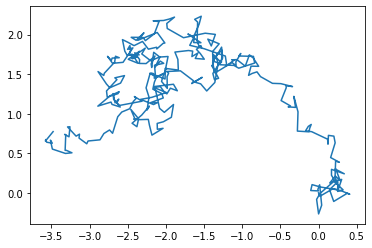

In [11]:
delta=0.5
T=10.0
N=329
dt=T/N
xb=np.empty((2,N+1))
xb[:,0]=0.0

brownian(xb[:,0], N, dt, delta, out=xb[:,1:])

plt.plot(xb[0],xb[1])

yb=np.sqrt(xb[1]**2+xb[0]**2)
yt=yb.reshape(10,33)
#fig, ax = plt.subplots(figsize=(10, 2.18))
#sns.heatmap(yt, cmap="viridis")
#plt.gca().invert_yaxis()


In [12]:
data=pd.read_table('datos.txt')
ngc604=(data.round(2)).pivot(index='Y', columns='X', values='RV')

In [13]:
Sq=pd.read_table('square.csv',delimiter=',')

In [14]:
im=Image.open("Lenna.png")
img=im.convert('LA')

/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/elliptical_powerlaw.py:249: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     3.438
Date:                Wed, 17 Jun 2020   Prob (F-statistic):             0.0822
Time:                        06:17:50   Log-Likelihood:                 659.16
No. Observations:                  18   AIC:                            -1314.
Df Residuals:                      16   BIC:                            -1313.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.666e-17   2.42e-17     -2.749      0.0

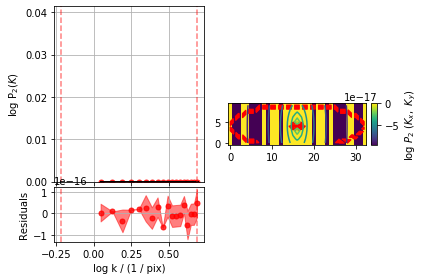

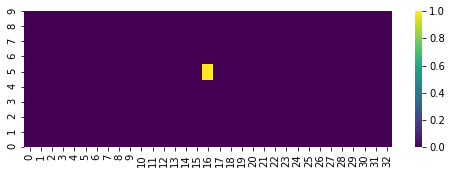

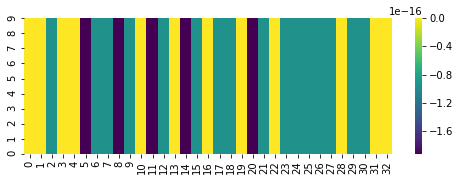

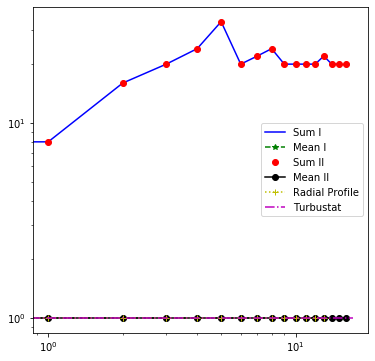

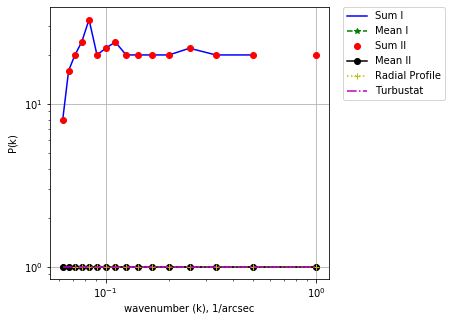

In [15]:
x=specterl(x)

/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/elliptical_powerlaw.py:237: RuntimeWarning: overflow encountered in exp
  ellip = 1. / (1 + np.exp(-ellip_transf))
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_pspec2.py:421: UserWarning: The elliptical parameter is close to 1. The field may be isotropic and the fit is not converging to 1. Consider fitting with `fix_ellip_params=True`, which forces the ellipticity to 1.
  warnings.warn("The elliptical parameter is close to 1. The field "
/home/zalenovo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_pspe

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     25.53
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           0.000118
Time:                        06:17:57   Log-Likelihood:                 1.2798
No. Observations:                  18   AIC:                             1.440
Df Residuals:                      16   BIC:                             3.221
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6345      0.262     -2.425      0.0

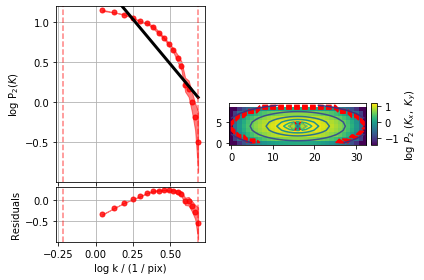

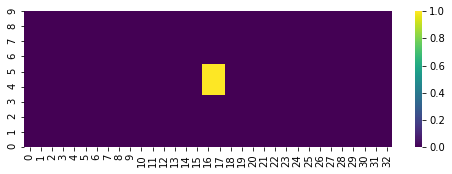

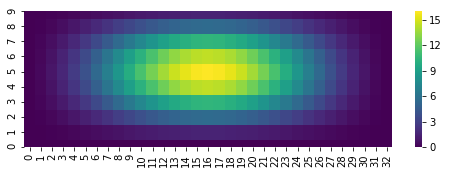

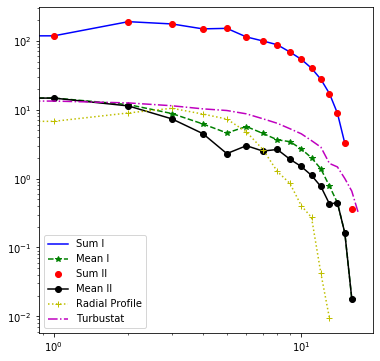

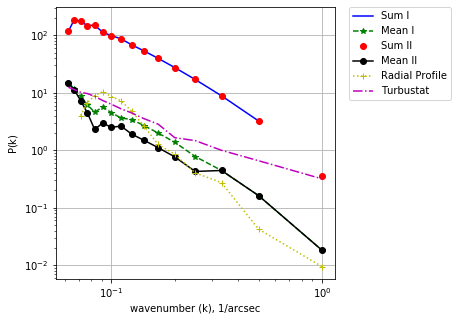

In [16]:
x=specter(a)

/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/elliptical_powerlaw.py:249: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     275.8
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           1.64e-11
Time:                        06:18:04   Log-Likelihood:               -0.90911
No. Observations:                  18   AIC:                             5.818
Df Residuals:                      16   BIC:                             7.599
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9552      0.139     -6.884      0.0

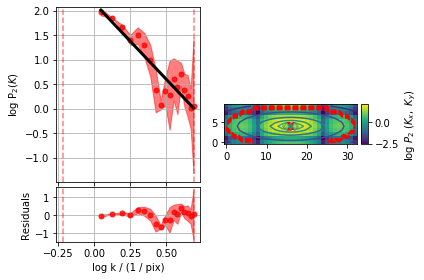

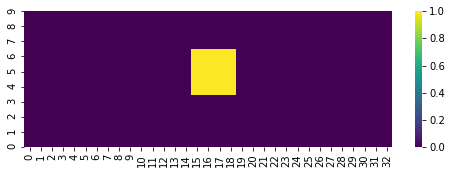

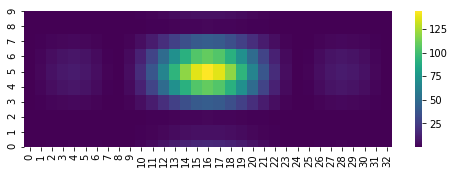

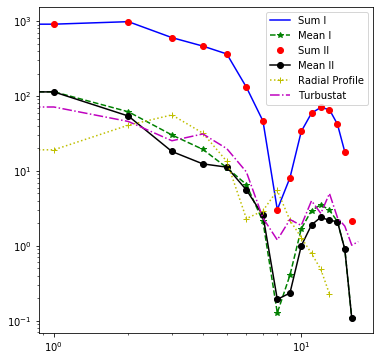

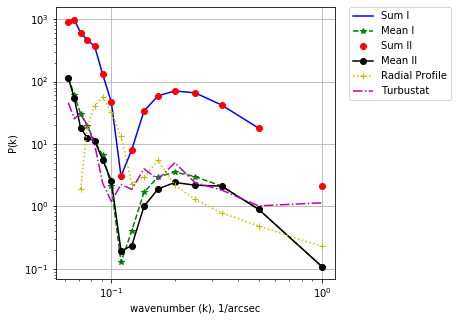

In [17]:
x=specter(b)

In [18]:
#x=specterlt(Sq)

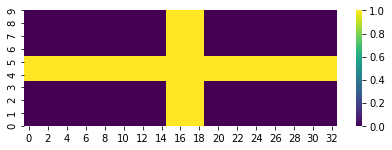

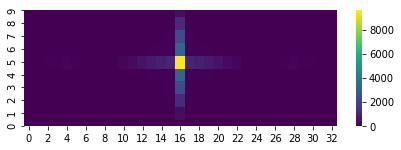

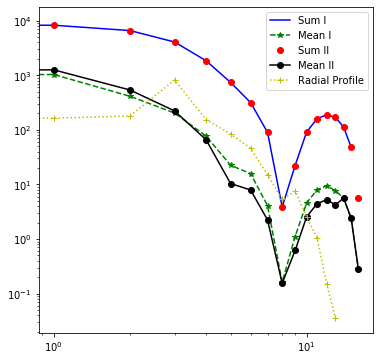

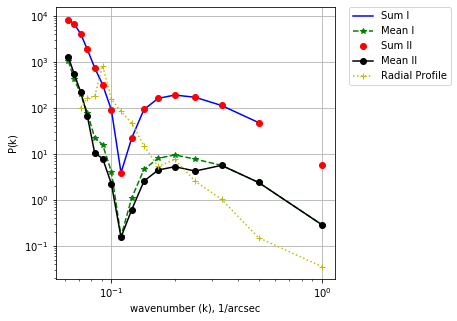

In [19]:
x=specterlt(c)

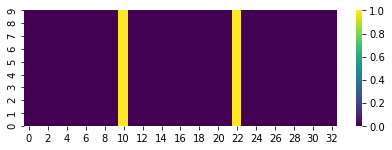

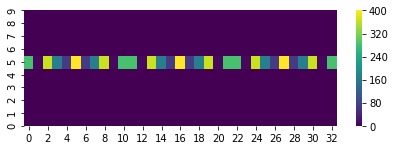

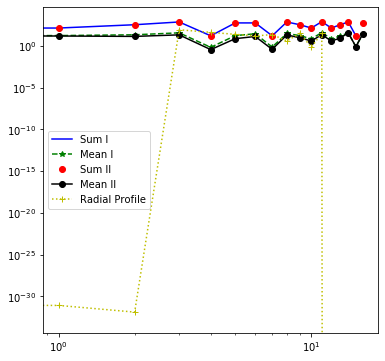

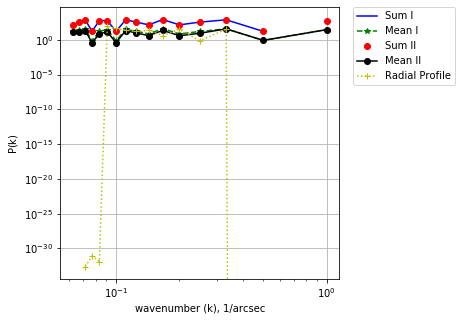

In [20]:
x=specterlt(d)

/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_pspec2.py:572: RuntimeWarning: divide by zero encountered in log10
  im1 = ax.imshow(np.log10(self.ps2D), interpolation="nearest",
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/elliptical_powerlaw.py:249: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.2459
Date:                Wed, 17 Jun 2020   Prob (F-statistic):              0.627
Time:                        06:18:22   Log-Likelihood:                -22.404
No. Observations:                  18   AIC:                             48.81
Df Residuals:                      16   BIC:                             50.59
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8797      0.882      2.132      0.0

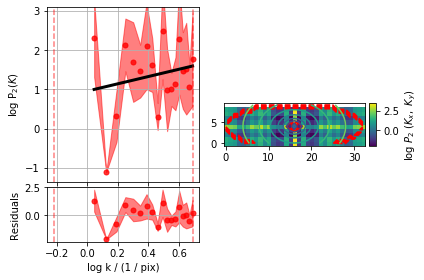

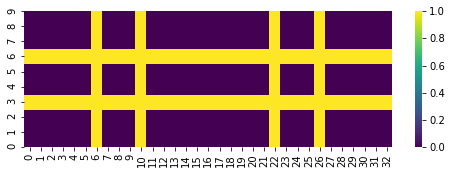

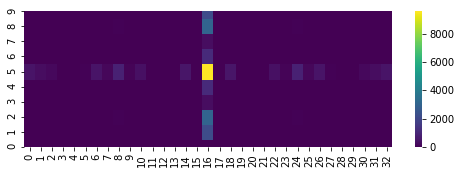

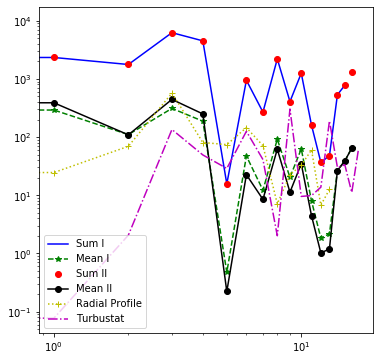

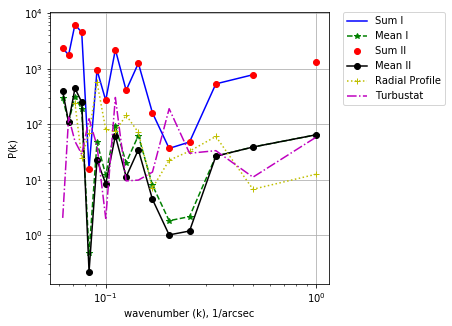

In [21]:
x=specter(d1)

/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/elliptical_powerlaw.py:249: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                   0.05027
Date:                Wed, 17 Jun 2020   Prob (F-statistic):              0.825
Time:                        06:18:32   Log-Likelihood:                0.13247
No. Observations:                  18   AIC:                             3.735
Df Residuals:                      16   BIC:                             5.516
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4454      0.137     10.573      0.0

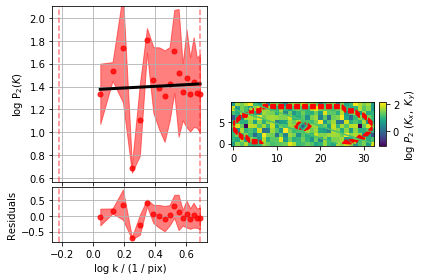

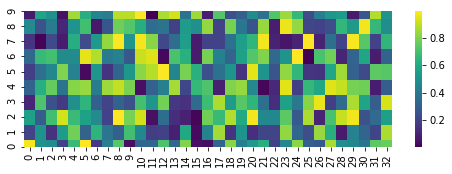

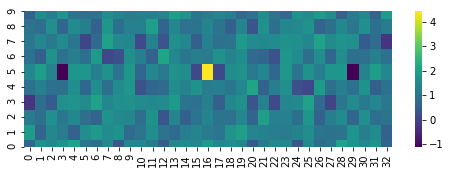

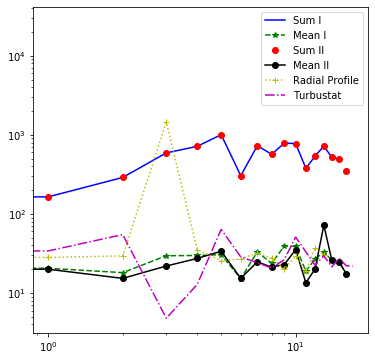

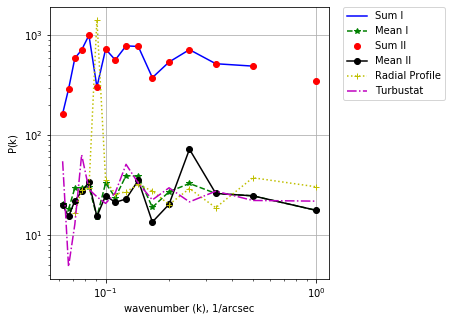

In [22]:
x=specterl(r0)

/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/elliptical_powerlaw.py:237: RuntimeWarning: overflow encountered in exp
  ellip = 1. / (1 + np.exp(-ellip_transf))
/home/zalenovo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/elliptical_powerlaw.py:249: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     1.293
Date:                Wed, 17 Jun 2020   Prob (F-statistic):              0.272
Time:                        06:18:40   Log-Likelihood:                -24.631
No. Observations:                  18   AIC:                             53.26
Df Residuals:                      16   BIC:                             55.04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3255      0.893      0.364      0.7

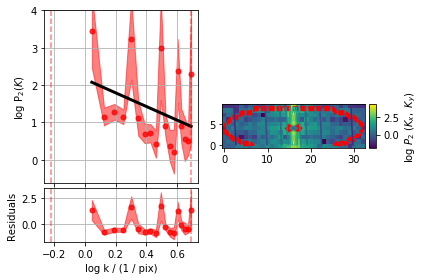

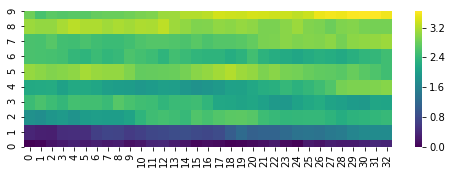

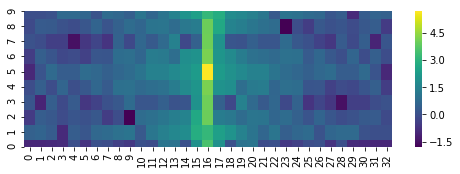

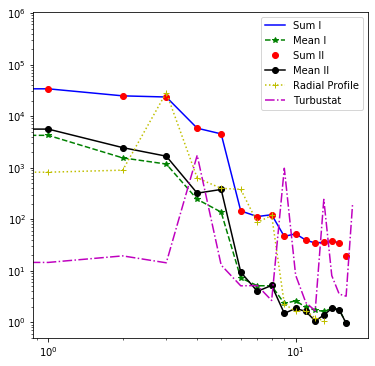

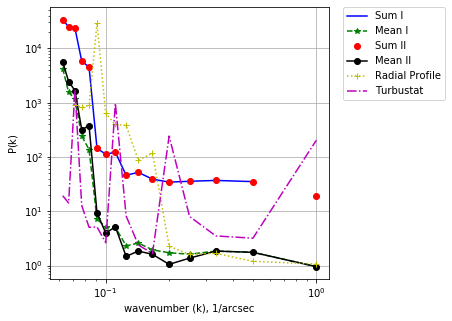

In [23]:
x=specterl(yt)

/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/elliptical_powerlaw.py:249: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     54.33
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           1.58e-06
Time:                        06:18:48   Log-Likelihood:               -0.56080
No. Observations:                  18   AIC:                             5.122
Df Residuals:                      16   BIC:                             6.902
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0938      0.178     17.338      0.0

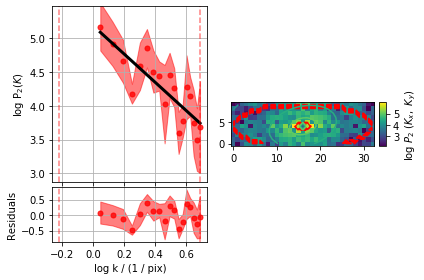

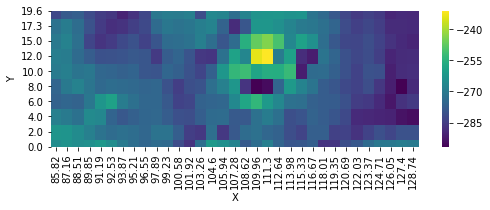

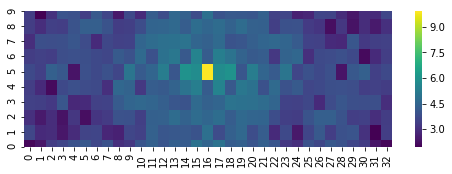

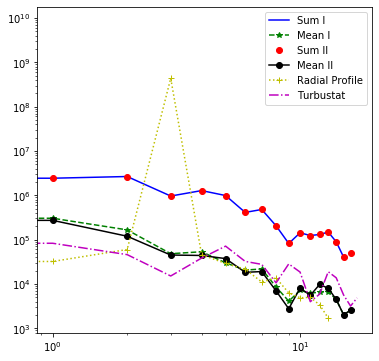

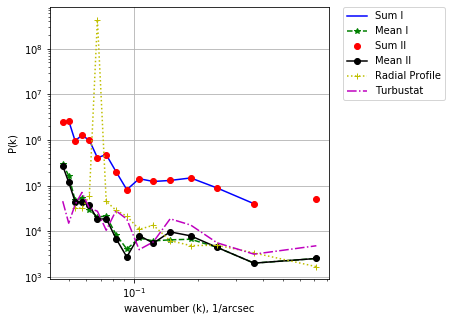

In [24]:
x=specterl(ngc604)

In [25]:
imx=scipy.fftpack.fft2(img)
FT2=scipy.fftpack.fftshift(imx)
power_s=np.abs(FT2)**2


In [26]:
#np.array(img)

In [27]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 72.34824681282043 seconds ---
